Just as a start to chapter 4, I have implemented (heavily influenced by the books source code) a hill climbing algorithm to solve the travelling salesperson problem (TSP). It is a LOT quicker than the graph search implementation and only requires constant memory. While the "full" romania problem was unattainable on my chromebook when implemented as a graph search problem, the hill climbing variant implemented below deals with the "full" problem easily.   

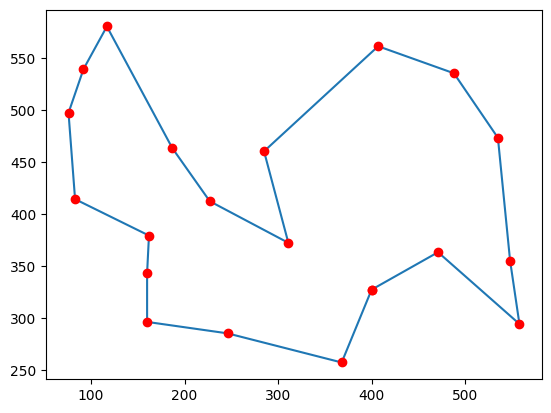

In [9]:
from search_2 import *
from utils import *
import numpy as np
import matplotlib.pyplot as plt

romania = {'A': ( 76, 497), 'B': (400, 327), 'C': (246, 285), 'D': (160, 296), 'E': (558, 294), 
           'F': (285, 460), 'G': (368, 257), 'H': (548, 355), 'I': (488, 535), 'L': (162, 379),
           'M': (160, 343), 'N': (407, 561), 'O': (117, 580), 'P': (311, 372), 'R': (227, 412),
           'S': (187, 463), 'T': ( 83, 414), 'U': (471, 363), 'V': (535, 473), 'Z': (92, 539)}

distances = {}
cities = []

for city in romania.keys():
    distances[city] = {}
    cities.append(city)

for name_1, coordinates_1 in romania.items():
        for name_2, coordinates_2 in romania.items():
            distances[name_1][name_2] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])
            distances[name_2][name_1] = np.linalg.norm(
                [coordinates_1[0] - coordinates_2[0], coordinates_1[1] - coordinates_2[1]])

def cost(route):
    c = 0
    for i in range(len(route)-1):
        c += distances[route[i]][route[i+1]]
    c += distances[route[0]][route[-1]]
    return c

class TSP(Problem):
    
    def two_opt(self, state):
        neighbour_state = state[:]
        left = random.randint(0, len(neighbour_state) - 1)
        right = random.randint(0, len(neighbour_state) - 1)
        if left > right:
            left, right = right, left
        neighbour_list = list(neighbour_state)
        x = neighbour_list[left: right + 1]
        neighbour_list[left: right + 1] = x[::-1]
        neighbour_state = tuple(neighbour_list)
        return neighbour_state
        
    def is_goal(self, state):
        return cost(state) < 1603
    
    def actions(self, state): 
        """The places neighboring `state`."""
        new_states = set()
        new_states.add(state)
        for i in range(5):
            new_state = self.two_opt(state)
            new_states.add(new_state)
        return new_states
    
    def result(self, state, action):
        """Go to the `action` place, if the map says that is possible."""
        return action
    
    def action_cost(self, s, action, s1):
        """The distance (cost) to go from s to s1."""
        if(type(s1) == tuple):
            return cost(s1)
        if(type(s1) == list):
            return cost(tuple(s1))
       

    def value(self, state):
        """ value of path cost given negative for the given state """
        return -1 * self.action_cost(None, None, state)

def hill_climbing(problem):
    
    """From the initial node, keep choosing the neighbor with highest value,
    stopping when no neighbor is better. [Figure 4.2]"""
    
    def find_neighbors(state, number_of_neighbors=1000):
        """ finds neighbors using two_opt method """
        
        neighbors = []
        
        for i in range(number_of_neighbors):
            new_state = problem.two_opt(state)
            neighbors.append(Node(new_state))
            state = new_state

        return neighbors

    # as this is a stochastic algorithm, we will set a cap on the number of iterations
    iterations = 10000

    current = Node(problem.initial)
    
    while iterations:
        neighbors = find_neighbors(current.state)
        if not neighbors:
            break
        neighbor = argmax_random_tie(neighbors,key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) >= problem.value(current.state):
            current.state = neighbor.state
        iterations -= 1
        
    return current.state


tsp = TSP(cities)
path = hill_climbing(tsp)

data = []
for p in path:
    data.append(romania[p])
data.append(data[0])

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()